In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import boxcox
from scipy.special import boxcox1p
from sklearn import linear_model
from scipy.stats import norm
import statsmodels.api as sm
import scipy.stats as stats
from sklearn import linear_model

pd.set_option('max_columns',1000,'max_rows',1000)

In [238]:
train_data = pd.read_csv('pre_processed_train_data.csv')
test_data = pd.read_csv('pre_processed_test_data.csv')
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,4,65.0,8450,1,1,3,3,2,4,0,5,2,2,0,5,7,5,2003,2003,1,1,13,14,1,196.0,3,2,2,2,3,1,6,706.0,1,0.0,150.0,856.0,1,5,1,5,856,854,0,1710,1.0,0.0,2,1,3,1,3,8,7,0,0,1,2003,2,2.0,548.0,3,3,2,0,61,0,0,0,0,0,0,1,0,2,2008,9,4,208500
1,20,4,80.0,9600,1,1,3,3,2,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,2,2,1,2,3,4,5,978.0,1,0.0,284.0,1262.0,1,5,1,5,1262,0,0,1262,0.0,1.0,2,0,3,1,2,6,7,1,3,1,1976,2,2.0,460.0,3,3,2,298,0,0,0,0,0,0,0,1,0,5,2007,9,4,181500
2,60,4,68.0,11250,1,1,0,3,2,4,0,5,2,2,0,5,7,5,2001,2002,1,1,13,14,1,162.0,3,2,2,2,3,2,6,486.0,1,0.0,434.0,920.0,1,5,1,5,920,866,0,1786,1.0,0.0,2,1,3,1,3,6,7,1,3,1,2001,2,2.0,608.0,3,3,2,0,42,0,0,0,0,0,0,1,0,9,2008,9,4,223500
3,70,4,60.0,9550,1,1,0,3,2,0,0,6,2,2,0,5,7,5,1915,1970,1,1,14,16,2,0.0,2,2,0,3,4,1,5,216.0,1,0.0,540.0,756.0,1,3,1,5,961,756,0,1717,1.0,0.0,1,0,3,1,3,7,7,1,4,5,1998,1,3.0,642.0,3,3,2,0,35,272,0,0,0,0,0,1,0,2,2006,9,0,140000
4,60,4,84.0,14260,1,1,0,3,2,2,0,15,2,2,0,5,8,5,2000,2000,1,1,13,14,1,350.0,3,2,2,2,3,3,6,655.0,1,0.0,490.0,1145.0,1,5,1,5,1145,1053,0,2198,1.0,0.0,2,1,4,1,3,9,7,1,3,1,2000,2,3.0,836.0,3,3,2,192,84,0,0,0,0,0,0,1,0,12,2008,9,4,250000


# Transforming values

In [239]:
numerical_set = {'1stFlrSF' : 0, '2ndFlrSF' : -1, '3SsnPorch' : 1, 'EnclosedPorch' : 1, 'GrLivArea' : 0, 'LotArea' : 0, 'LowQualFinSF' : 1, 'MiscVal' : 1, 'OpenPorchSF' : 0, 'PoolArea' : 1, 'ScreenPorch' : 1, 'BsmtFinSF1' : 0, 'BsmtFinSF2' : 1, 'BsmtUnfSF' : 0.5, 'GarageArea' : 1, 'LotFrontage' : 1, 'MasVnrArea' : -1, 'TotalBsmtSF' : 0.5, 'WoodDeckSF' : -1}
counting_set = {'BedroomAbvGr' : 1, 'Fireplaces' : 0, 'FullBath' : 0, 'HalfBath' : -1, 'KitchenAbvGr' : 1, 'TotRmsAbvGrd' : 0, 'BsmtFullBath' : -1, 'BsmtHalfBath' : 1, 'GarageCars' : 1}
preference_set = {'MSSubClass' : 0.5, 'Alley' : 1, 'BldgType' : -1, 'CentralAir' : 1, 'Condition1' : 0, 'Condition2' : 1, 'Exterior1st' : 1, 'Exterior2nd' : 1, 'Foundation' : 1, 'GarageType' : -0.5, 'Heating' : 1, 'HouseStyle' : 0.5, 'LandContour' : 1, 'LandSlope' : 1, 'LotConfig' : 0.5, 'LotShape' : 1, 'MSZoning' : 1, 'MasVnrType' : 1, 'MiscFeature' : 1, 'Neighborhood' : 0.5, 'RoofMatl' : 1, 'RoofStyle' : -1, 'SaleCondition' : 1, 'SaleType' : 1, 'Street' : 1}
score_set = {'OverallCond' : 0.5, 'OverallQual' : 1, 'BsmtCond' : 1, 'BsmtExposure' : 0, 'BsmtFinType1' : 1, 'BsmtFinType2' : -0.5, 'BsmtQual' : 1, 'Electrical' : 1, 'ExterCond' : 0, 'ExterQual' : 0, 'Fence' : 1, 'FireplaceQu' : 0, 'Functional' : 1, 'GarageCond' : 1, 'GarageFinish' : 0.5, 'GarageQual' : 1, 'HeatingQC' : 1, 'KitchenQual' : 0.5, 'PavedDrive' : 1, 'PoolQC' : 1, 'Utilities' : 1}
date_set = {'MoSold' : 1, 'YearBuilt' : 1, 'YearRemodAdd' : 1, 'YrSold' : 1, 'GarageYrBlt' : 1}

allvariables = dict()
allvariables.update(numerical_set)
allvariables.update(counting_set)
allvariables.update(preference_set)
allvariables.update(score_set)
allvariables.update(date_set)

len(allvariables.keys())

79

In [240]:
for i in list(allvariables.keys()):
    try:
        train_data[i] = boxcox(train_data[i], allvariables[i])
    except:
        train_data[i] = boxcox1p(train_data[i], allvariables[i])
        
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,13.491933,4.0,65.0,9.041922,1.0,1.0,3.0,3.0,1.0,2.472136,0.0,2.898979,1.098612,2.0,0.0,2.898979,6.0,2.472136,2002.0,2002.0,0.5,1.0,13.0,14.0,1.0,0.994924,1.098612,1.098612,2.0,2.0,3.0,0.693147,6.0,6.561031,0.585786,0.0,22.576411,56.549125,1.0,4.0,1.0,5.0,6.752270,0.998830,0.0,7.444249,0.5,0.0,1.098612,0.5,3.0,1.0,1.464102,2.079442,6.0,0.000000,0.000000,0.585786,2003.0,1.464102,2.0,548.0,3.0,3.0,2.0,0.000000,4.127134,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2007.0,9.0,4.0,208500
1,6.944272,4.0,80.0,9.169518,1.0,1.0,3.0,3.0,1.0,1.464102,0.0,8.000000,0.693147,2.0,0.0,1.464102,5.0,3.656854,1975.0,1975.0,0.5,1.0,8.0,8.0,2.0,0.000000,0.693147,1.098612,1.0,2.0,3.0,1.609438,5.0,6.886532,0.585786,0.0,31.763886,69.077423,1.0,4.0,1.0,5.0,7.140453,0.000000,0.0,7.140453,0.0,1.0,1.098612,0.0,3.0,1.0,0.828427,1.791759,6.0,0.693147,1.386294,0.585786,1976.0,1.464102,2.0,460.0,3.0,3.0,2.0,0.996656,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2006.0,9.0,4.0,181500
2,13.491933,4.0,68.0,9.328123,1.0,1.0,0.0,3.0,1.0,2.472136,0.0,2.898979,1.098612,2.0,0.0,2.898979,6.0,2.472136,2000.0,2001.0,0.5,1.0,13.0,14.0,1.0,0.993865,1.098612,1.098612,2.0,2.0,3.0,1.098612,6.0,6.188264,0.585786,0.0,39.713307,58.695964,1.0,4.0,1.0,5.0,6.824374,0.998847,0.0,7.487734,0.5,0.0,1.098612,0.5,3.0,1.0,1.464102,1.791759,6.0,0.693147,1.386294,0.585786,2001.0,1.464102,2.0,608.0,3.0,3.0,2.0,0.000000,3.761200,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,2007.0,9.0,4.0,223500
3,14.733201,4.0,60.0,9.164296,1.0,1.0,0.0,3.0,1.0,0.000000,0.0,3.291503,1.098612,2.0,0.0,2.898979,6.0,2.472136,1914.0,1969.0,0.5,1.0,14.0,16.0,2.0,0.000000,0.693147,1.098612,0.0,3.0,4.0,0.693147,5.0,5.379897,0.585786,0.0,44.518813,53.027266,1.0,2.0,1.0,5.0,6.867974,0.998679,0.0,7.448334,0.5,0.0,0.693147,0.0,3.0,1.0,1.464102,1.945910,6.0,0.693147,1.609438,1.183503,1998.0,0.828427,3.0,642.0,3.0,3.0,2.0,0.000000,3.583519,272.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2005.0,9.0,0.0,140000
4,13.491933,4.0,84.0,9.565214,1.0,1.0,0.0,3.0,1.0,1.464102,0.0,6.000000,1.098612,2.0,0.0,2.898979,7.0,2.472136,1999.0,1999.0,0.5,1.0,13.0,14.0,1.0,0.997151,1.098612,1.098612,2.0,2.0,3.0,1.386294,6.0,6.486161,0.585786,0.0,42.317040,65.705244,1.0,4.0,1.0,5.0,7.043160,0.999051,0.0,7.695303,0.5,0.0,1.098612,0.5,4.0,1.0,1.464102,2.197225,6.0,0.693147,1.386294,0.585786,2000.0,1.464102,3.0,836.0,3.0,3.0,2.0,0.994819,4.442651,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.0,2007.0,9.0,4.0,250000


# Fitting and getting R^2

In [241]:
ols = linear_model.LinearRegression()

X = np.array(train_data[list(set(list(train_data)) - {'SalePrice'})])
y = np.array(train_data['SalePrice']).reshape(-1,1)
ols.fit(X, y)
print('Error : ' + str((1 - ols.score(X,y)) * 100) + '%')

Error : 15.998539759008978%


# K-Fold

In [255]:
model = linear_model.LinearRegression()

X = np.array(train_data[list(set(list(train_data)) - {'SalePrice'})])
y = np.array(train_data['SalePrice'])

mean_error = []
std_error = []
kfold = range(2, 100)

for i in kfold:
    scores = ms.cross_val_score(model, X, y, cv=i)
    mean_error.append(1 - scores.mean())
    std_error.append(scores.std())

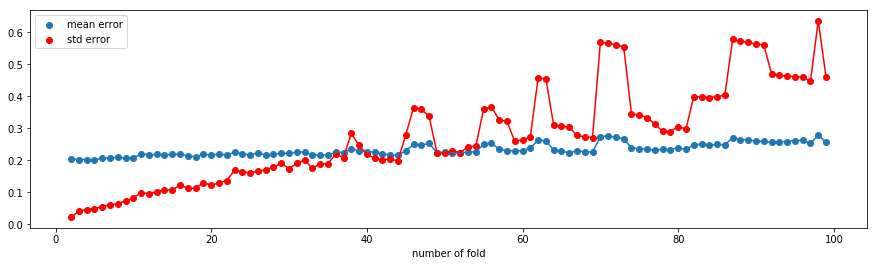

In [256]:
plt.figure(figsize=(15,4))
s1 = plt.scatter(kfold, mean_error, label='mean error')
plt.plot(kfold, mean_error)
s2 = plt.scatter(kfold, std_error, color='red', label='std error')
plt.plot(kfold, std_error, color='red')
plt.xlabel('number of fold')
plt.legend(handles=[s1, s2], loc=2)
plt.show()

In [257]:
#Finding out number of folds with minimum train errors
x = kfold
y = mean_error
z = std_error

result_table = pd.DataFrame({'Number_of_folds' : x, 'Mean_error' : y, 'Std_error' : z})
print(result_table[result_table['Mean_error'] == result_table['Mean_error'].min()])
print(result_table[result_table['Std_error'] == result_table['Std_error'].min()])

   Number_of_folds  Mean_error  Std_error
3                5    0.200315   0.049843
   Number_of_folds  Mean_error  Std_error
0                2    0.205498   0.022071
